# A brief introduction to JuliaReach

### Marcelo Forets, Universidad de la República, Uruguay.

#### Berlin Julia Users Meetup 2019, Berlin, August 7th, 2019

## Outline of this talk

- Context of the JuliaReach org

- LazySets: from low dimensions to high dimensions using multiple dispatch

- Applications

  - Neural network verification
  - Reachability analysis of uncertain dynamical systems

## What is JuliaReach?

- A toolbox to do *Reachability Computations for Dynamical Systems in Julia*

#### What are dynamical systems?

<font color='red'> Just about anything that evolves with time! <red>

- In particular we focus on **cyber-physical systems:** <font color='blue'> a device that by means of computation is able to control or interact with a physical process</font>

- Examples:
    - embedded controllers (aircrafts, autonomous cars, ...)
    - medical devices; safety-critical or mission-critical devices; power systems stability; ...

<img src="ICCOPT2019/fig/CPS.png" width=600>

## Who *makes* JuliaReach?

<img src="BerlinUsersGroup/People.png" align="center" width=650>

<font size="-1">Bogomolov, S., Forets, M., Frehse, G., Potomkin, K., & Schilling, C. (2019, April). JuliaReach: a toolbox for set-based reachability. <b> In Proceedings of the 22nd ACM International Conference on Hybrid Systems: Computation and Control (pp. 39-44), ACM.</b> </font>

## An intro to LazySets 

In [10]:
using LazySets, Plots
using AbstractTrees

AbstractTrees.children(x::Type) = subtypes(x)
print_tree(LazySet)

LazySet
├─ AbstractCentrallySymmetric
│  ├─ Ball2
│  ├─ Ballp
│  └─ Ellipsoid
├─ AbstractPolyhedron
│  ├─ AbstractPolytope
│  │  ├─ AbstractCentrallySymmetricPolytope
│  │  │  ├─ AbstractZonotope
│  │  │  │  ├─ AbstractHyperrectangle
│  │  │  │  │  ├─ AbstractSingleton
│  │  │  │  │  │  ├─ Singleton
│  │  │  │  │  │  └─ ZeroSet
│  │  │  │  │  ├─ BallInf
│  │  │  │  │  ├─ Hyperrectangle
│  │  │  │  │  ├─ Interval
│  │  │  │  │  └─ SymmetricIntervalHull
│  │  │  │  ├─ LineSegment
│  │  │  │  └─ Zonotope
│  │  │  └─ Ball1
│  │  ├─ AbstractPolygon
│  │  │  ├─ AbstractHPolygon
│  │  │  │  ├─ HPolygon
│  │  │  │  └─ HPolygonOpt
│  │  │  └─ VPolygon
│  │  ├─ HPolytope
│  │  └─ VPolytope
│  ├─ HPolyhedron
│  ├─ HalfSpace
│  ├─ Hyperplane
│  ├─ Line
│  └─ Universe
├─ AffineMap
├─ CacheMinkowskiSum
├─ CartesianProduct
├─ CartesianProductArray
├─ ConvexHull
├─ ConvexHullArray
├─ EmptySet
├─ ExponentialMap
├─ ExponentialProjectionMap
├─ Intersection
├─ IntersectionArray
├─ LinearMap
├─ MinkowskiSu

### Convex sets

<img src="BerlinUsersGroup/convex_sets.png" width=600>

## Balls

<img src="BerlinUsersGroup/balls1.png" width=600>

## More balls

<img src="BerlinUsersGroup/ball2.png" width=600>

## Unbounded  sets

<img src="BerlinUsersGroup/unbounded_sets.png" width=600>

## Translation

<img src="BerlinUsersGroup/translation.png" width=500>

## Minkowski sum

<img src="BerlinUsersGroup/minkowski_sum.png" width=500>

## Linear map

<img src="BerlinUsersGroup/linear_map.png" width=500>

## Projection

<img src="BerlinUsersGroup/projection.png" width=500>

## Union (not convex)

<img src="BerlinUsersGroup/union.png" width=500>

## Convex hull

<img src="BerlinUsersGroup/convex_hull.png" width=600>

## Intersection

<img src="BerlinUsersGroup/intersection.png" width=500>

## A high-dimensional demo

In [ ]:
L₁ = LineSegment([0.0, 0.0], [1.0, 1.0])
L₂ = LineSegment([0.0, 0.0], [-1.0, 1.0])
plot(L₁)
plot!(L₂)

In [ ]:
plot!(L₁ ⊕ L₂)
L₃ = LineSegment([0.0, 0.0], [0.0, 1.0])

In [ ]:
plot(L₁ ⊕ L₂ ⊕ L₃)

In [ ]:
X = [rand(LineSegment) for _ in 1:100]
plot(X)

In [ ]:
Y = MinkowskiSumArray(X)
plot(Y)
plot!(vertices_list(Y))

## A high-dimensional demo

- We'l work with a 100-dimensional set which has... `exp(100 * log(2)) ≈ 1.2676506002282317e30` vertices.

In [70]:
H = rand(Hyperrectangle, dim=100);
d = ones(Float64, 100);

In [71]:
@btime σ($d, $H);

  97.050 ns (1 allocation: 896 bytes)


In [72]:
σ(d, H) ∈ H

true

In [73]:
M = rand(100, 100)
P = project(M * H, [99, 100], LinearMap);

In [74]:
@btime project($M * $H, [99, 100], LinearMap);

  651.521 ns (15 allocations: 2.63 KiB)


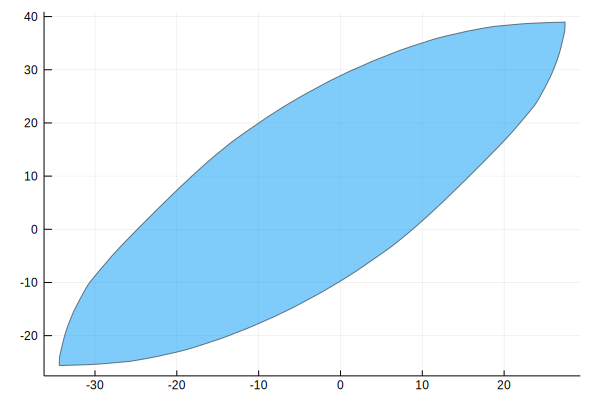

In [75]:
plot(overapproximate(P, HPolygon, 1e-2))

In [80]:
@btime overapproximate($P, HPolygon, 1e-2)

  16.663 ms (10893 allocations: 2.97 MiB)


HPolygon{Float64}(HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[HalfSpace{Float64,Array{Float64,1}}([1.0, 0.0], 59.3398), HalfSpace{Float64,Array{Float64,1}}([0.980785, 0.19509], 71.9015), HalfSpace{Float64,Array{Float64,1}}([0.92388, 0.382683], 81.7768), HalfSpace{Float64,Array{Float64,1}}([0.83147, 0.55557], 88.5864), HalfSpace{Float64,Array{Float64,1}}([0.707107, 0.707107], 92.0686), HalfSpace{Float64,Array{Float64,1}}([0.55557, 0.83147], 92.0894), HalfSpace{Float64,Array{Float64,1}}([0.382683, 0.92388], 88.6482), HalfSpace{Float64,Array{Float64,1}}([0.19509, 0.980785], 81.8771), HalfSpace{Float64,Array{Float64,1}}([0.0, 1.0], 72.0363), HalfSpace{Float64,Array{Float64,1}}([-0.0444605, 0.999011], 69.4208)  …  HalfSpace{Float64,Array{Float64,1}}([0.964989, -0.262291], 39.9318), HalfSpace{Float64,Array{Float64,1}}([0.970962, -0.239233], 41.6829), HalfSpace{Float64,Array{Float64,1}}([0.977136, -0.212617], 43.7054), HalfSpace{Float64,Array{Float64,1}}([0.980848, -0.194775], 45

In [81]:
f(B) = M * H ⊕ B
B = Ball2(100 * rand(100), 2.0)
P = project(f(B), [99, 100], LinearMap);

In [79]:
@btime f($B)

  61.150 ns (2 allocations: 64 bytes)


MinkowskiSum{Float64,LinearMap{Float64,Hyperrectangle{Float64},Float64,Array{Float64,2}},Ball2{Float64}}(LinearMap{Float64,Hyperrectangle{Float64},Float64,Array{Float64,2}}([0.850733 0.829261 … 0.24797 0.262343; 0.589077 0.342921 … 0.381546 0.0782568; … ; 0.300484 0.279613 … 0.0927591 0.446477; 0.909262 0.294161 … 0.494402 0.734955], Hyperrectangle{Float64}([-0.703713, 0.157051, -0.672884, -0.254412, 1.07036, 0.157169, -0.0758222, 0.218267, -2.83684, -0.0165159  …  1.16904, 0.710912, 0.35657, 1.61172, -1.20456, -0.41658, -0.197501, 1.65477, 2.71736, 1.25608], [0.137156, 0.496576, 0.122476, 0.33142, 2.2767, 0.622647, 0.00417522, 0.0716649, 1.50485, 1.17094  …  0.193609, 1.34673, 1.05655, 0.138119, 1.31267, 0.0610448, 0.310624, 2.00374, 0.0733485, 1.04473])), Ball2{Float64}([76.4493, 92.8461, 91.3955, 7.13363, 17.7478, 20.4587, 29.317, 33.3211, 18.9079, 43.6403  …  49.3594, 23.784, 5.7038, 12.9211, 72.8995, 56.2226, 92.5188, 87.691, 29.8813, 31.076], 2.0))

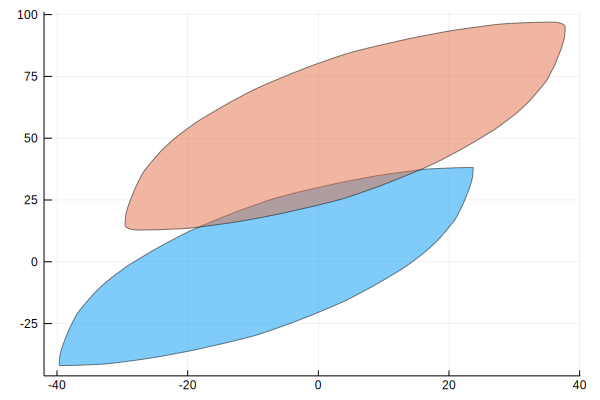

In [68]:
plot!(overapproximate(P, HPolygon, 1e-3))

In [82]:
@btime overapproximate($P, HPolygon, 1e-3)

  37.953 ms (24945 allocations: 6.80 MiB)


HPolygon{Float64}(HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[HalfSpace{Float64,Array{Float64,1}}([1.0, 0.0], 67.2004), HalfSpace{Float64,Array{Float64,1}}([0.998795, 0.0490677], 71.4796), HalfSpace{Float64,Array{Float64,1}}([0.995185, 0.0980171], 75.5914), HalfSpace{Float64,Array{Float64,1}}([0.989177, 0.14673], 79.526), HalfSpace{Float64,Array{Float64,1}}([0.980785, 0.19509], 83.2737), HalfSpace{Float64,Array{Float64,1}}([0.970031, 0.24298], 86.8257), HalfSpace{Float64,Array{Float64,1}}([0.95694, 0.290285], 90.1734), HalfSpace{Float64,Array{Float64,1}}([0.941544, 0.33689], 93.3086), HalfSpace{Float64,Array{Float64,1}}([0.92388, 0.382683], 96.2238), HalfSpace{Float64,Array{Float64,1}}([0.903989, 0.427555], 98.9121)  …  HalfSpace{Float64,Array{Float64,1}}([0.98866, -0.150174], 53.336), HalfSpace{Float64,Array{Float64,1}}([0.98972, -0.143019], 54.0246), HalfSpace{Float64,Array{Float64,1}}([0.99458, -0.103978], 57.7324), HalfSpace{Float64,Array{Float64,1}}([0.995226, -0.0975

## Closure properties

<img src="BerlinUsersGroup/closure_properties.png" align="center" width=550>

## Fair enough, show me the trick.

<img src="BerlinUsersGroup/multiple_dispatch.png" align="center" width=550>


<font size="-1"> <b> [KAR19] </b>  Stefan Karpinksi (Julia Computing). <b> The Unreasonable Effectiveness of Multiple Dispatch.</b> JuliaCon 2019</font>

https://www.youtube.com/watch?v=kc9HwsxE1OY

## The *lazy evaluation* paradigm

- Principle of [lazy evaluation](https://en.wikipedia.org/wiki/Lazy_evaluation): delay the evaluation of an expression until its value is needed.
- **Question:** what do i *really* need to compute if i just want $\rho(d, MH \oplus B)$?

- **Answer:** combine basic machinery in  <font color='green'> convex geometry </font> with the <font color='green'>lazy evaluation paradigm,</font> letting Julia to handle the appropriate dispatch for your computation.

## Calculus with suport functions

<img src="BerlinUsersGroup/support_function.png" width=600>

## Calculus with suport functions (cont.)

<img src="BerlinUsersGroup/support_function_properties.png" width=300>

## Case study: *lazy* Minkowski sum 

- Implement the Minkowski sum operator as a new `LazySet`, with two basic functions:
    - dimension
    - compute its support vector (or support function) 

```julia
function ρ(d::AbstractVector{N}, ms::MinkowskiSum{N}) where {N<:Real}
    return ρ(d, ms.X) + ρ(d, ms.Y)
end
```

## Hold on, did he just say that `⊕` is a *set*?

```julia
struct MinkowskiSum{N<:Real, S1<:LazySet{N}, S2<:LazySet{N}} <: LazySet{N}
    X::S1
    Y::S2

    # default constructor with dimension check
    function MinkowskiSum{N, S1, S2}(X::S1, Y::S2) where
            {N<:Real, S1<:LazySet{N}, S2<:LazySet{N}}
        @assert dim(X) == dim(Y) "sets in a Minkowski sum must have the " *
            "same dimension"
        return new{N, S1, S2}(X, Y)
    end
end
```

```julia
@neutral(MinkowskiSum, ZeroSet)
@absorbing(MinkowskiSum, EmptySet)
⊕(X::LazySet, Y::LazySet) = MinkowskiSum(X, Y)
```

## Reachability Analysis in JuliaReach

There is an increasing demand for using formal methods to validate and verify safety-critical systems in fields such as power generation and distribution, avionics, automotive systems, and medical systems. In particular, newer standards, such as DO-178C (avionics), ISO 26262 (automotive systems), IEC 62304 (medical devices), and CENELEC EN 50128 (railway systems), emphasize the need for formal methods and model-based development, thereby speeding up the adaptation of such methods in industry. 

### The problem

- Complex, real-world systems are prone to *failures*
- New industrial standars explicitly recommend the user of *formal methods:* DO-178C (avionics), ISO 26262 (automotive systems), IEC 62304 (medical devices), and CENELEC EN 50128 (railway systems).

<img src="ICCOPT2019/fig/CPSfail.png" width=600>

- Engineers need *safety* and *reliability* guarantees to take design decisions under non-deterministic inputs, parameters or noise

$\Longrightarrow$<font color='green'> The field of **reachability analysis** is concerned with understanding the set of all possible behaviors of such systems.

<font size="-1">Bogomolov, S., Forets, M., Frehse, G., Potomkin, K., & Schilling, C. (2019, April). JuliaReach: a toolbox for set-based reachability. <b> In Proceedings of the 22nd ACM International Conference on Hybrid Systems: Computation and Control (pp. 39-44), ACM.</b> </font>

### References to our research work


- **[BFFPSV18]** Reach Set Approximation through Decomposition with Low-dimensional Sets and High-dimensional Matrices. S. Bogomolov, M. Forets, G. Frehse, , A. Podelski,  C. Schilling and F. Viry (2018) HSCC'18 Proceedings of the 21st International Conference on Hybrid Systems: Computation and Control: 41–50.

- **[ARCH-COMP18-AFF]** ARCH-COMP18 Category Report: Continuous and Hybrid Systems with Linear Continuous Dynamics. M. Althoff, S. Bak, X. Chen, C. Fan, M. Forets, G. Frehse, N. Kochdumper, Y. Li, S. Mitra, R. Ray, C. Schilling and S. Schupp (2018) ARCH18. 5th International Workshop on Applied Verification of Continuous and Hybrid Systems, 54: 23–52. doi: 10.29007/73mb.

- **[BFFPS19]** JuliaReach: a Toolbox for Set-Based Reachability. Sergiy Bogomolov, Marcelo Forets, Goran Frehse, Kostiantyn Potomkin, Christian Schilling. Published in Proceedings of HSCC'19: 22nd ACM International Conference on Hybrid Systems: Computation and Control (HSCC'19).

### References to our research work (cont.)

- **[BFFPS19b]** Reachability analysis of linear hybrid systems via block decomposition. Sergiy Bogomolov, Marcelo Forets, Goran Frehse, Kostiantyn Potomkin, Christian Schilling.

- **[ARCH-COMP19-AFF]** ARCH-COMP19 Category Report: Continuous and Hybrid Systems with Linear Continuous Dynamics. Matthias Althoff, Stanley Bak, Marcelo Forets, Goran Frehse, Niklas Kochdumper, Rajarshi Ray, Christian Schilling and Stefan Schupp (2019) ARCH19. 6th International Workshop on Applied Verification of Continuous and Hybrid Systems, vol 61, pages 14–40 doi: 10.29007/bj1w.

- **[ARCH-COMP19-NLN]** ARCH-COMP19 Category Report: Continuous and Hybrid Systems with Nonlinear Dynamics. Fabian Immler, Matthias Althoff, Luis Benet, Alexandre Chapoutot, Xin Chen, Marcelo Forets, Luca Geretti, Niklas Kochdumper, David P. Sanders and Christian Schilling (2019) ARCH19. 6th International Workshop on Applied Verification of Continuous and Hybrid Systems, vol 61, pages 41–61 doi: 10.29007/bj1w.

## ISS Benchmark

- ISS: structural model of component 1R (Russian service module) of the international space station
- 270 state variables with three uncertain inputs
- linear time-invariant: $x'(t) = Ax(t) + Bu(t)$, $u(t) \in \mathcal{U}$, $y(t) = Cx(t) + Du(t)$
- specification: output $y_3(t)$ is within the range $[0.0007, 0.0007]$ for all $t \in [0, 20]$.

<img src="BerlinUsersGroup/iss_fig.png" align="center" width=550>

### ISS Benchmark

<img src="BerlinUsersGroup/iss_CORA.png" align="center" width=400>

### ISS Benchmark

<img src="BerlinUsersGroup/iss_JuliaReach.png" align="center" width=400>

### ISS Benchmark

<img src="BerlinUsersGroup/iss_Results.png" align="center" width=450>

### Quadrotor benchmark

- nonlinear
- 12 dimensions
- safety property: stabilization of the height after some given time horizon, which should stay within given bounds
- uncertain positions and uncertain velocities

<img src="BerlinUsersGroup/quadcopter_Eqs.png" align="center" width=550>

### Quadrotor benchmark

<img src="BerlinUsersGroup/quadcopter_CORA.png" align="center" width=500>

### Quadrotor benchmark

<img src="BerlinUsersGroup/quadcopter_FlowStar.png" align="center" width=500>

### Quadrotor benchmark

<img src="BerlinUsersGroup/quadcopter_JuliaReach.png" align="center" width=500>

### Quadrotor benchmark

<img src="BerlinUsersGroup/quadcopter_Results.png" align="center" width=600>

## Verifying Deep Neural Networks

<img src="BerlinUsersGroup/nnets_verif.png" align="center" width=550>

- Deep neural networks are widely used for nonlinear function approximation with applications ranging from computer vision to control.
- It can be very challenging to <font color='red'> verify whether a particular network satis es certain input-output properties. </font>
- `LazySets` is being used in https://github.com/sisl/NeuralVerification.jl as a convenient framework to work with *sets*
- (work-in-progress) We can scale even further, using lazy intersections and lazy `ReLU` functions (it's a bit rough, but if you are curious, see my notebook https://nbviewer.jupyter.org/github/mforets/escritoire/blob/master/reachability/Lazy_NNets.ipynb)

If you are interested check https://github.com/sisl/NeuralVerification.jl and their recent review paper:

<img src="BerlinUsersGroup/nnet_review.png" align="center" width=550>

- https://arxiv.org/ftp/arxiv/papers/1903/1903.06758.pdf
- https://www.youtube.com/watch?v=psJaVeJmNnI

## Any sufficiently advanced technology is indistinguishable from magic.

(Clark's third law)

## Conclusions

- Convex sets are expressive, calculus is tractable.
- Closure under most standard set operations.
- Support functions allow for lazy (on-demand) computations.
- Non-convex sets: approximate by (union of) convex sets.
- Julia is an excellent choice to reason about set-based algorithms.

### Acknowledgements

<font size=-1>
    
- JuliaReach development is led by:
  - Marcelo Forets (Univ. de la República, Uruguay)
  - Christian Schilling (Institute of Science and Technology, Austria)

- Contributors to JuliaReach open projects include:
  - A. Deshmuhk (Indian Institute of Information Technology, India) 
  - B. Garate (Univ. de la República, Uruguay)
  - S. Guadalupe (Univ. de la República, Uruguay)
  - N. Kekatos (Univ. Grenoble Alpes, France)
  - B. Legat (UCLouvain, Belgium)
  - K. Potomkin (ANU, Australia)
  - A. Rocca (INRIA, France)
  - F. Viry (CERFACS, France)

- Scientific collaborators:
    - L. Benet (UNAM, México)
    - S. Bogomolov (ANU, Australia)
    - G. Frehse (ENSTA ParisTech, France)
    - A. Podelski (Univ. of Freiburg, Germany),
    - David P. Sanders (UNAM, México)
</font>

---


<font color='blue' size=+1> Join the effort!  </font> https://github.com/juliareach<br> <https://gitter.im/JuliaReach/Lobby

<font color='green' size=+1> Contact: mforets@gmail.com </font> http://github.com/mforets

<img src="BerlinUsersGroup/mu1_zono.png" align="center" width=550>